### AcO_M1Pos_FEM_cl_seg1-6

In [1]:
import dos
from IPython.display import Image
path = './dos/AcO_M1Pos_FEM_cl_seg1-6/'

INFO:DOS:Reading config from ./dos/AcO_M1Pos_FEM_cl_seg1-6/dos.yaml
INFO:DOS:New driver: M1
INFO:M1:New input: Txyz
INFO:M1:New input: Rxyz
INFO:M1:New input: modes
INFO:M1:No inputs!
INFO:DOS:New driver: M2
INFO:M2:New input: Txyz
INFO:M2:New input: Rxyz
INFO:M2:No inputs!
INFO:DOS:New driver: wfs48
INFO:wfs48:No inputs!
INFO:wfs48:New output: M12_RBM
INFO:wfs48:Output logged in!
INFO:DOS:New driver: AcO_controller
INFO:AcO_controller:New input: x_hat
INFO:AcO_controller:New output: M1 TxyzRxyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M2 Txyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M2 Rxyz
INFO:AcO_controller:Output logged in!
INFO:AcO_controller:New output: M1 BM
INFO:AcO_controller:Output logged in!
INFO:DOS:New driver: M1Pos0
INFO:M1Pos0:New input: TxyzRxyz
INFO:M1Pos0:New output: M1Pos_DeltaF
INFO:M1Pos0:Output logged in!
INFO:DOS:New driver: FEM
INFO:FEM:New input: OSS_Harpoint_delta_F
INFO:FEM:New output: OSS_AzDrive_D
I

SIMCEO server received: Acknowledging connection from SIMCEO client!


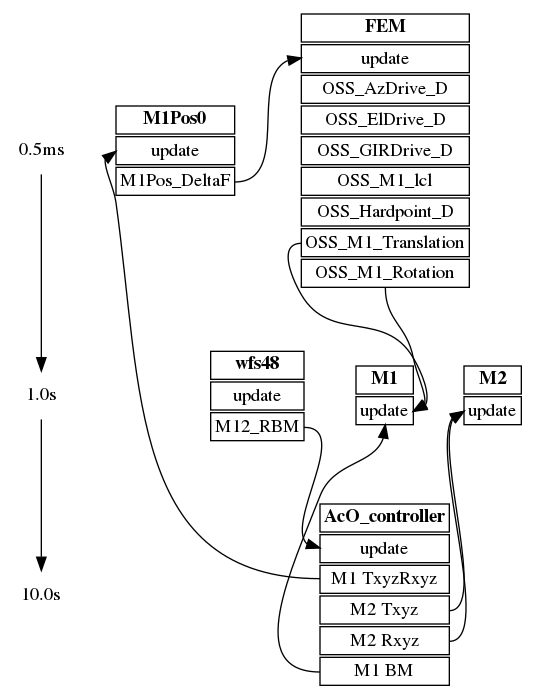

In [2]:
# init
sim = dos.DOS(path, 20, show_timing = 2)
Image(filename=path + '/timing.png')

In [ ]:
sim.start()

In [ ]:
sim.pctComplete

In [ ]:
sim.join()
sim.terminate()

logs = sim.logs.entries

In [5]:
# Save

import pickle
'''
with open('./logs/AcO_M1Pos_FEM_cl_seg1-6.sclogs', 'wb') as f:
    pickle.dump(sim.logs.entries, f)
    logs = sim.logs.entries
'''
# Load
'''
logs = pickle.load( open( './logs/AcO_M1Pos_FEM_cl_seg1-6.sclogs', "rb" ) )
''';

# plot logs
---

In [6]:
import matplotlib.pyplot as plt
try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

import numpy as np

duration = sim.cfg['simulation']['duration']
xticks = np.arange(0, duration + 1, duration/ 10)

logs

{'wfs48': {'M12_RBM': <dos.dos.Entry at 0x7f91644c1110>},
 'AcO_controller': {'M1 TxyzRxyz': <dos.dos.Entry at 0x7f91644cf210>,
  'M2 Txyz': <dos.dos.Entry at 0x7f91644cf690>,
  'M2 Rxyz': <dos.dos.Entry at 0x7f91644cfb10>,
  'M1 BM': <dos.dos.Entry at 0x7f91644cff90>},
 'M1PosDebug0': {'M1Pos_DeltaF': <dos.dos.Entry at 0x7f91644d7490>,
  'M1Pos_io': <dos.dos.Entry at 0x7f914cc79e50>},
 'FEM': {'OSS_AzDrive_D': <dos.dos.Entry at 0x7f913d430c90>,
  'OSS_ElDrive_D': <dos.dos.Entry at 0x7f9132056a90>,
  'OSS_GIRDrive_D': <dos.dos.Entry at 0x7f9128caa890>,
  'OSS_M1_lcl': <dos.dos.Entry at 0x7f91373fa690>,
  'OSS_Hardpoint_D': <dos.dos.Entry at 0x7f910d949490>},
 'Reshape': {'M1 Txyz': <dos.dos.Entry at 0x7f91066102d0>,
  'M1 Rxyz': <dos.dos.Entry at 0x7f9106622990>}}

In [7]:
time_1 = logs['FEM']['OSS_M1_lcl'].timeSeries[0]
time_2000 = logs['wfs48']['M12_RBM'].timeSeries[0]
time_50000 = logs['AcO_controller']['M1 BM'].timeSeries[0]

AcO_ref = logs['AcO_controller']['M1 TxyzRxyz'].timeSeries[1]
M1Pos_in = logs['M1PosDebug0']['M1Pos_io'].timeSeries[1]
FEM_out = logs['FEM']['OSS_M1_lcl'].timeSeries[1]

Mount_Az = logs['FEM']['OSS_AzDrive_D'].timeSeries[1]
Mount_El = logs['FEM']['OSS_ElDrive_D'].timeSeries[1]
Mount_GIR = logs['FEM']['OSS_GIRDrive_D'].timeSeries[1]

/home/felipe/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


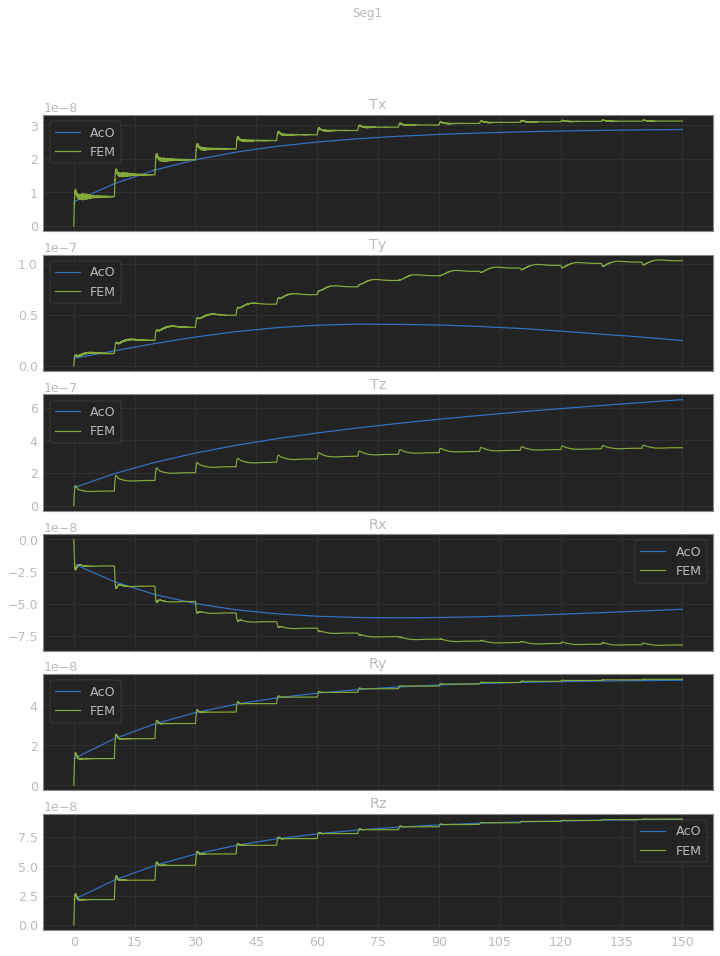

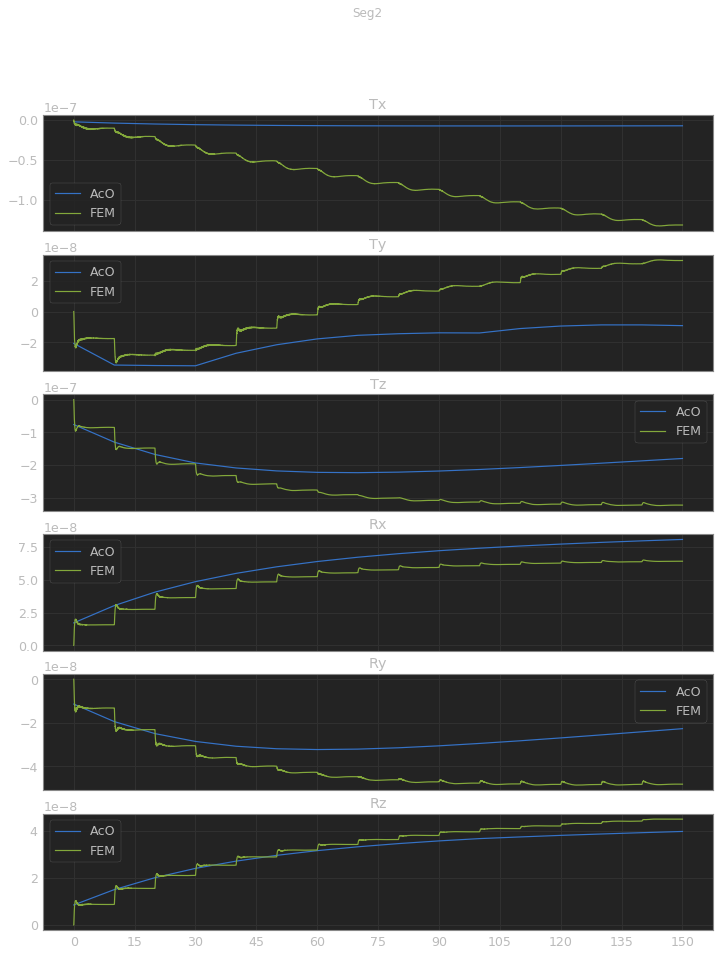

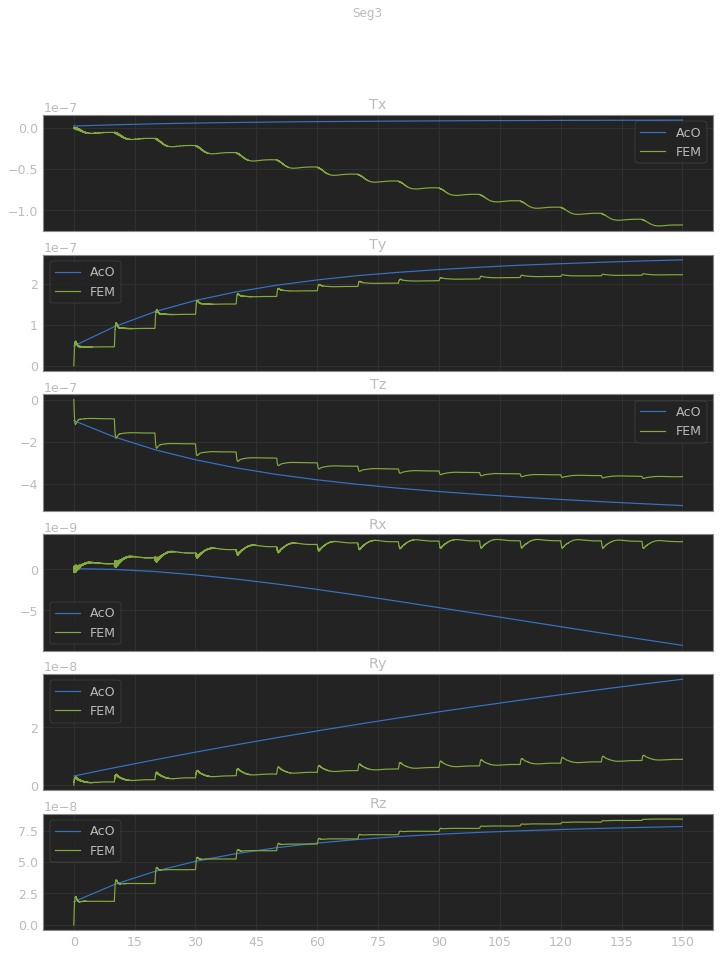

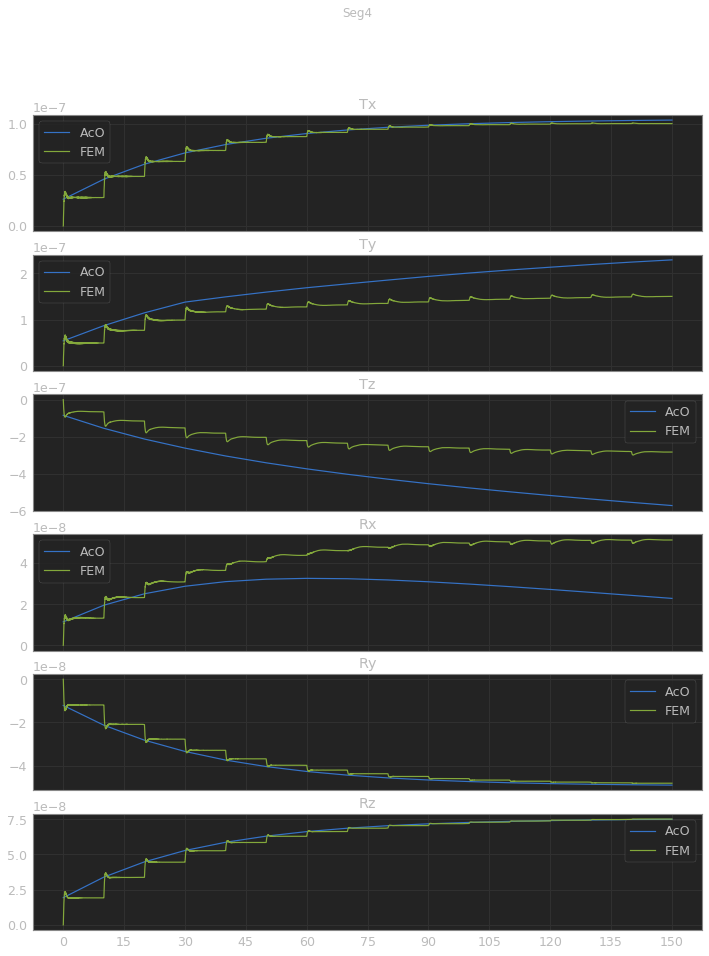

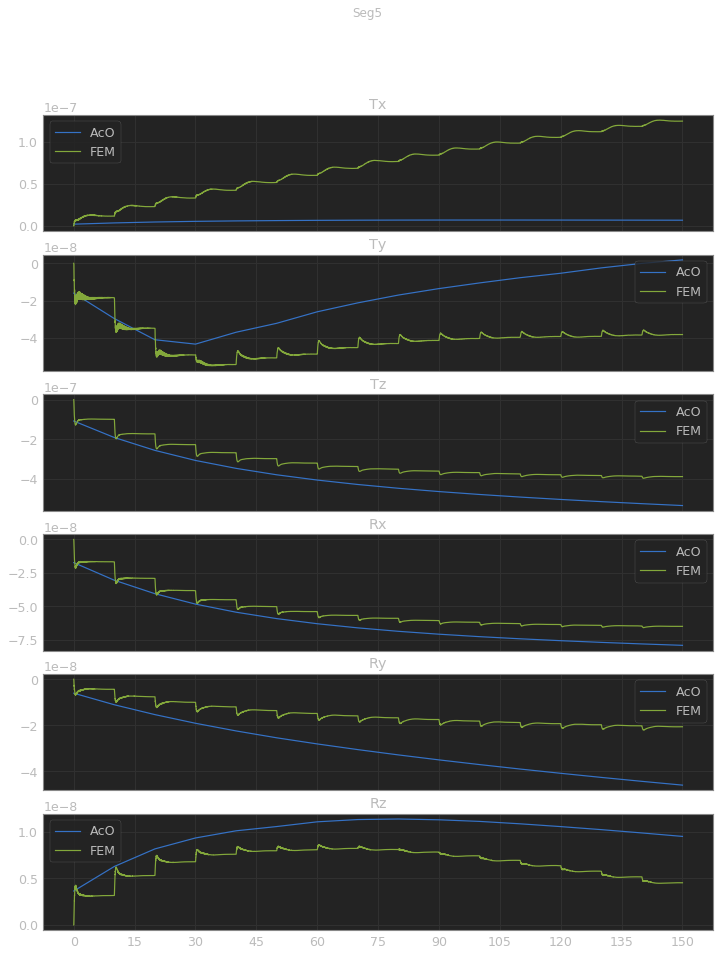

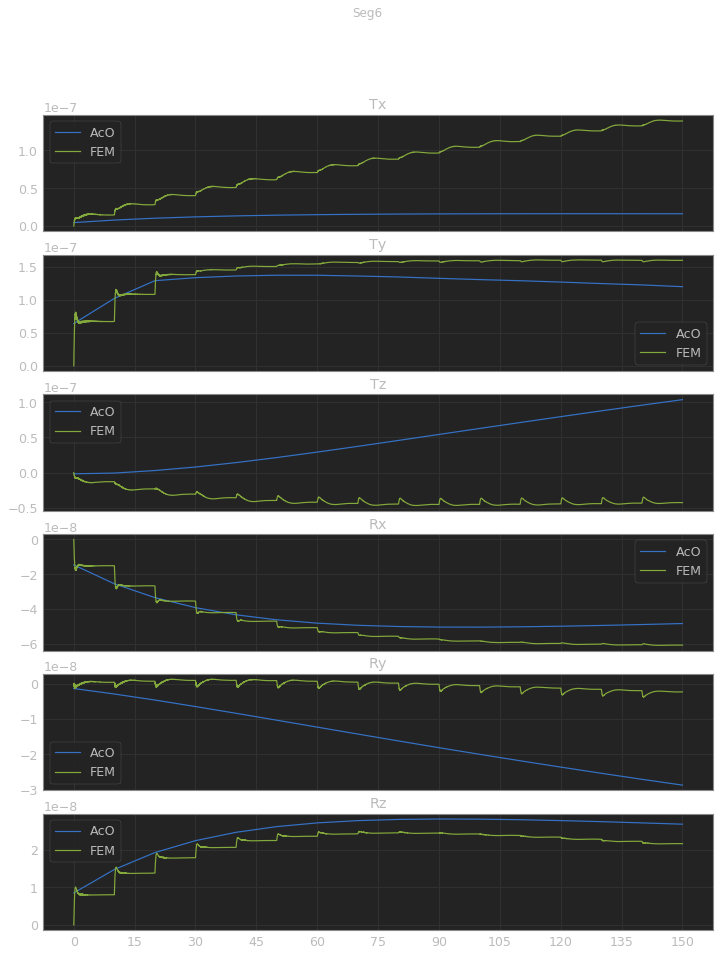

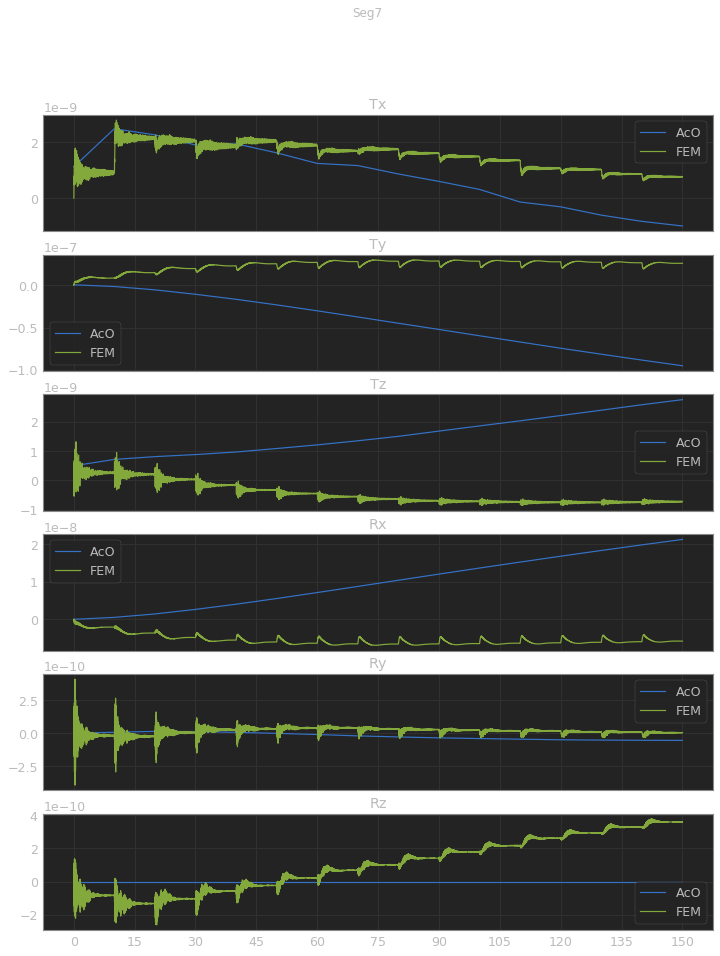

In [8]:
seg = list(range(7))
TRxyz = list(range(6))
rbm_str = ['Tx','Ty','Tz','Rx','Ry','Rz']
for s in seg:
    fig, ax = plt.subplots(6, 1, sharex=True, figsize=(12,15))
    fig.suptitle('Seg'  + str(s + 1), fontsize=12, horizontalalignment = 'center',
                verticalalignment = 'top')
    for rbm in TRxyz:
        ax[rbm].plot(time_1[::20000], AcO_ref[s,rbm,:], label = 'AcO')
        ax[rbm].plot(time_1, FEM_out[:,s * 6  + rbm], label = 'FEM')
        ax[rbm].set_xticks(xticks)
        ax[rbm].set_title(rbm_str[rbm])
        ax[rbm].legend()
    plt.show()

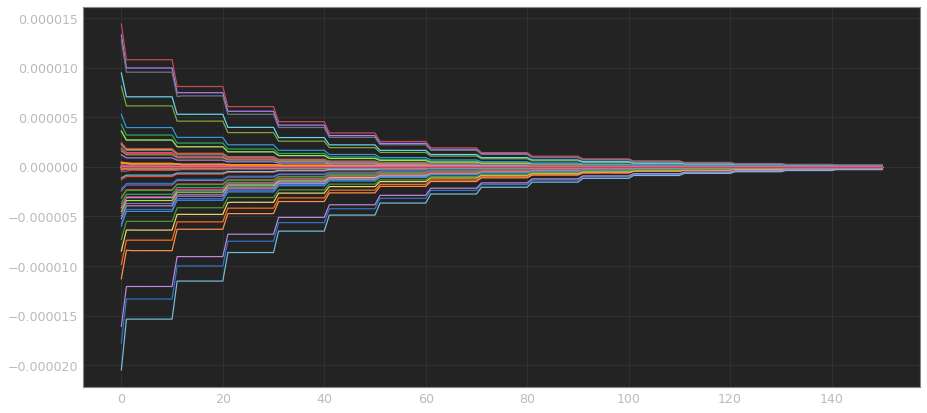

In [9]:
wfs = logs['wfs48']['M12_RBM'].timeSeries[1]

plt.figure(figsize = (15,7))
plt.plot(wfs)
plt.show()

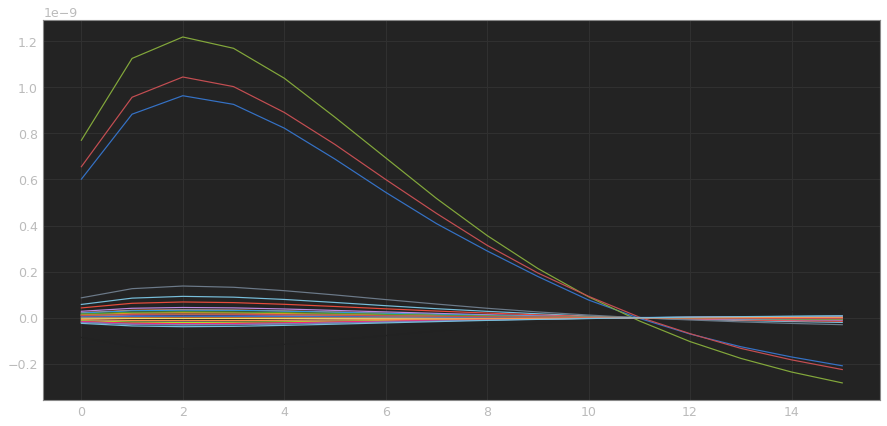

In [10]:
BM = logs['AcO_controller']['M1 BM'].timeSeries[1]

plt.figure(figsize = (15,7))
plt.plot(BM[0,:,:].T)
plt.show()

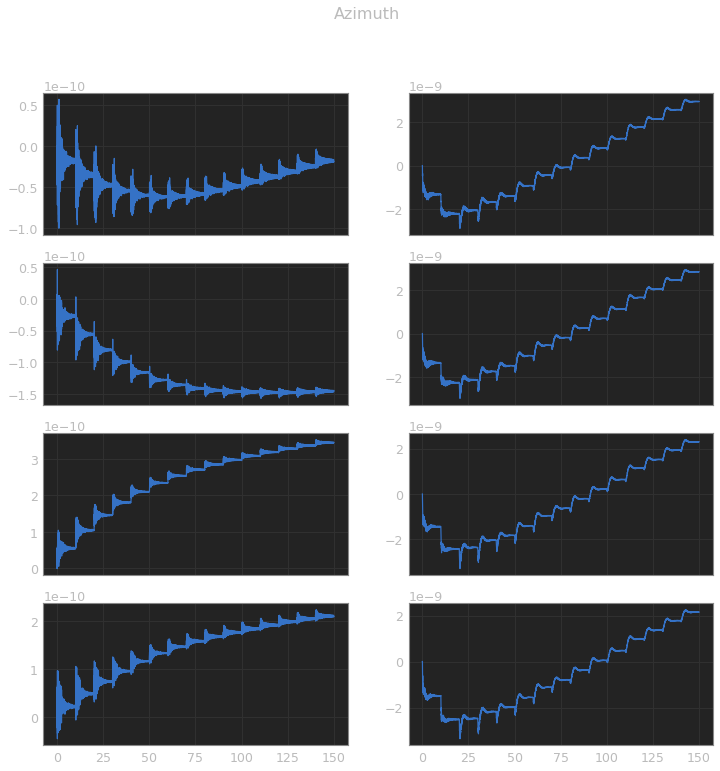

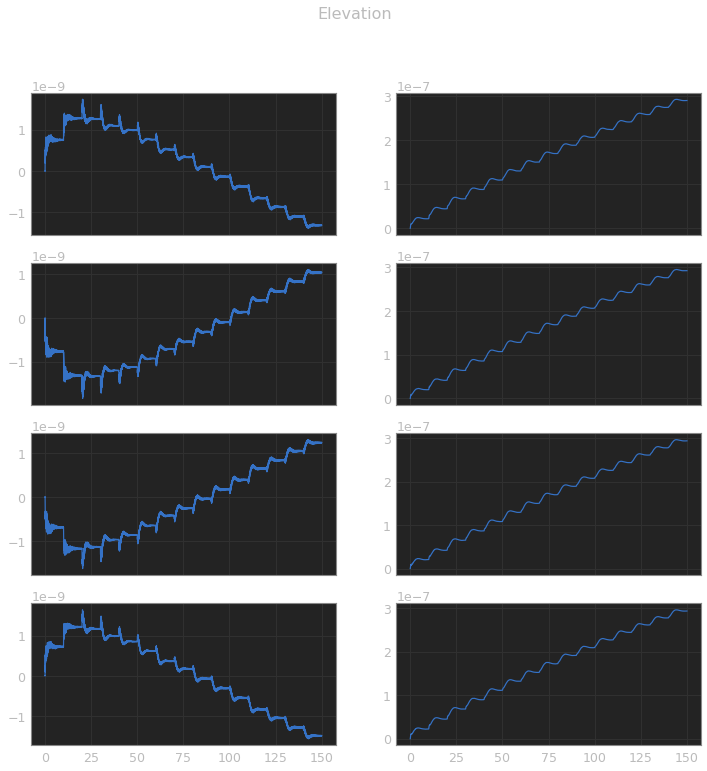

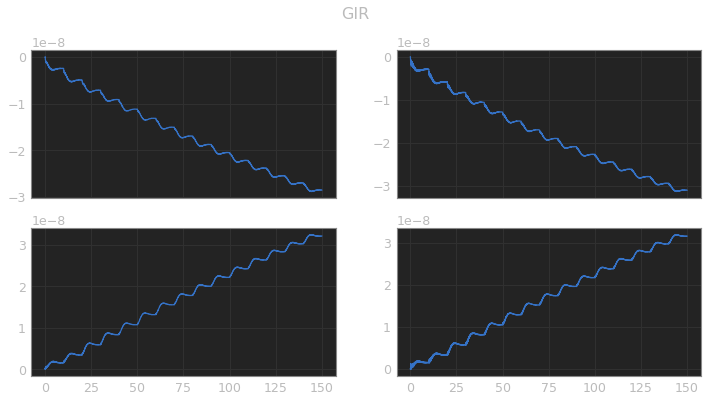

In [11]:
fig, ax = plt.subplots(4,2, sharex=True, figsize=(12,12))
fig.suptitle('Azimuth', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(8):
    ax[m%4,m//4].plot(time_1,Mount_Az[:,m])
plt.show()

fig, ax = plt.subplots(4,2, sharex=True, figsize=(12,12))
fig.suptitle('Elevation', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(8):
    ax[m%4,m//4].plot(time_1,Mount_El[:,m])
plt.show()

fig, ax = plt.subplots(2,2, sharex=True, figsize=(12,6))
fig.suptitle('GIR', fontsize=16, horizontalalignment = 'center',
                verticalalignment = 'top')
for m in range(4):
    ax[m%2,m//2].plot(time_1,Mount_GIR[:,m])
plt.show()